Text(0, 0.5, 'Type')

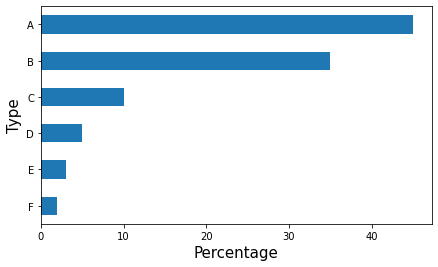

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

from matplotlib import font_manager

font_dirs = ['./']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
# plt.rcParams['font.family'] = 'Musisync'


df = pd.DataFrame({'perc': pd.Series([45, 35, 10, 5, 3, 2], index=['A', 'B', 'C','D','E','F'])})

# specify the custom font to use
plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Comic Sans MS'

fig, ax = plt.subplots(figsize=(7,4))
df.iloc[::-1].plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Percentage',fontsize=15)
ax.set_ylabel('Type',fontsize=15)


(-24.0, 504.0, -2.0, 42.0)
0.8333333333333334


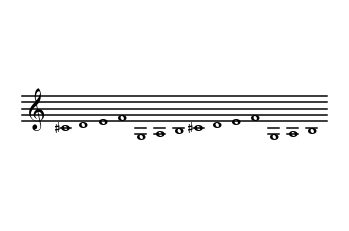

In [1]:
from matplotlib import pyplot as plt
from matplotlib import font_manager

def setup_score_font():
    font_dirs = ['./']
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)

    # set font
    plt.rcParams['font.family'] = 'Musisync'

def create_score(length=11):
    for i in range(5):
        plt.plot([0, 60+length*30], [i*10, i*10], 'k')

    factor = 400/(60+length*30)
    print(plt.axis('equal'))
    plt.axis('off')
    plt.text(10, 0, 'G', fontsize=50*factor)
    return  factor # factor to scale font size

def draw_note(note, octave, position, factor=1):

    pitch = {'C': -14, 'D': -9, 'E': -4, 'F': 1, 'G': 6, 'A': 11, 'B': 16}
    text = "w"
    x = 60 + position * 30
    if len(note) > 1: 
        x -= 9
        if note[1] == 'b':
            text = "bw"
        elif note[1] == '#':
            text = "Bw"
    y = pitch[note[0]] + octave*35

    if y <= -14:
        x_bar = x
        if len(note) > 1:
            x_bar += 10
        
        for i in range(-14, y-1, -10):
            plt.plot([x_bar-2, x_bar+15], [i+3.5, i+3.5], 'k')

    plt.text(x, y, text, fontsize=30*factor)




notes = [('C#', 0), ('D', 0), ('E', 0), ('F', 0), ('G', -1), ('A', -1), ('B', -1), ('C#', 0), ('D', 0), ('E', 0), ('F', 0), ('G', -1), ('A', -1), ('B', -1)]

setup_score_font()
f = create_score(len(notes))
print(f)
for i, n in enumerate(notes):
    draw_note(n[0], n[1], i, f)

plt.savefig('score.png', dpi=300)

